In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# or
import pickle



In [2]:
df=pd.read_csv('Daylio_Abid.csv')
df

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


In [3]:
df.columns

Index(['full_date', 'date', 'weekday', 'time', 'sub_mood', 'activities',
       'mood'],
      dtype='object')

In [4]:
df.dtypes

full_date     object
date          object
weekday       object
time          object
sub_mood      object
activities    object
mood          object
dtype: object

In [5]:
df.isna().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

In [6]:
df["activities"].value_counts()

activities
Dota 2 | streaming  | youtube                                                                        10
Dota 2                                                                                               10
Dota 2 | streaming                                                                                    5
prayer                                                                                                4
Dota 2 | Watching series  | streaming  | youtube                                                      4
                                                                                                     ..
Write dairy  | walk | meditation  | Audio books  | good meal | streaming  | youtube | new things      1
meditation  | youtube | research                                                                      1
prayer | good meal | youtube | movies                                                                 1
Write dairy  | Dota 2 | streaming  | shopping        

In [7]:
df.drop(columns=['full_date', 'date', 'time'],axis=1, inplace=True)
df

,weekday,sub_mood,activities,mood
0,Friday,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,Thursday,focused,reading | learning | Art | prayer | fasting ...,Good
2,Wednesday,confused,reading | learning | prayer | fasting | Qura...,Normal
3,Tuesday,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,Monday,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...
935,Sunday,yolo,Write dairy | walk | meditation | Audio book...,Good
936,Sunday,meh,meditation | youtube | research,Normal
937,Sunday,blessed,prayer | good meal | youtube | movies,Good
938,Saturday,angry,Write dairy | Dota 2 | streaming | shopping,Awful


In [8]:
df.isna().sum()

weekday        0
sub_mood       0
activities    47
mood           0
dtype: int64

In [9]:
df['activities'] = df['activities'].fillna('unknown')


In [10]:
df.isna().sum()

weekday       0
sub_mood      0
activities    0
mood          0
dtype: int64

In [11]:
df["activities"].value_counts()

activities
unknown                                                                                                                                                                                                                                                                47
Dota 2 | streaming  | youtube                                                                                                                                                                                                                                          10
Dota 2                                                                                                                                                                                                                                                                 10
Dota 2 | streaming                                                                                                                                                                             

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the string into lists
df['activities_list'] = df['activities'].apply(lambda x: x.split(' | ') if x != 'unknown' else ['unknown'])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit-transform the activities lists into a binary matrix
activities_encoded = mlb.fit_transform(df['activities_list'])

# Create a DataFrame with the encoded activities
activities_df = pd.DataFrame(activities_encoded, columns=mlb.classes_, index=df.index)

# Concatenate with the original DataFrame
df = pd.concat([df, activities_df], axis=1)

# (Optional) Drop the old activities columns if no longer needed
df.drop(columns=['activities', 'activities_list'], inplace=True)


In [13]:
df

,weekday,sub_mood,mood,Art,Audio books,Documentary,Dota 2,Email,Exercise,News Update,...,streaming,travel,trimming,unknown,video editing,walk,weight log,writing,yoga,youtube
0,Friday,yolo,Good,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,0,1
1,Thursday,focused,Good,1,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,Wednesday,confused,Normal,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,Tuesday,wondering,Normal,1,1,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
4,Monday,angry,Awful,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,Sunday,yolo,Good,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
936,Sunday,meh,Normal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
937,Sunday,blessed,Good,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
938,Saturday,angry,Awful,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
df["sub_mood"].value_counts()


sub_mood
blessed           174
focused           111
yolo              100
excited            91
wondering          64
confused           64
hungry             53
Cool               37
over the moon      34
weak               31
Chill              30
worried            28
meh                27
good               19
triggered          18
angry              16
sad af             13
scared              9
sick                8
happiest day        5
awful               4
bad                 4
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_8616\3469682176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_mood_counts.index, x=sub_mood_counts.values, palette='viridis')


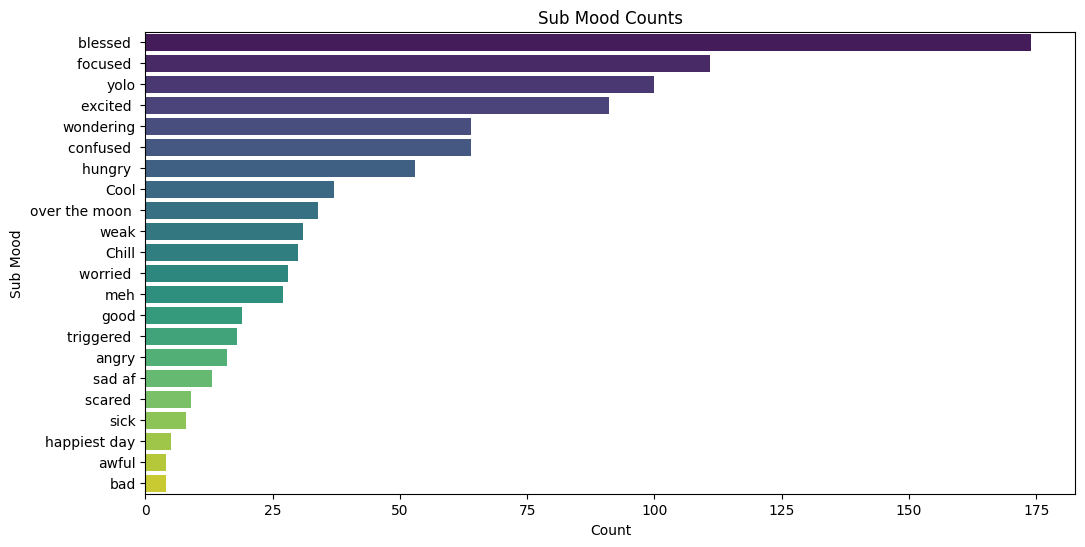

In [15]:
# Calculate counts of sub_mood
sub_mood_counts = df['sub_mood'].value_counts()

# Plot the counts
plt.figure(figsize=(12,6))
sns.barplot(y=sub_mood_counts.index, x=sub_mood_counts.values, palette='viridis')
plt.title('Sub Mood Counts')
plt.xlabel('Count')
plt.ylabel('Sub Mood')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sub_mood'] = le.fit_transform(df['sub_mood'])
le_weekday = LabelEncoder()
df['weekday'] = le_weekday.fit_transform(df['weekday'])

In [17]:
df

,weekday,sub_mood,mood,Art,Audio books,Documentary,Dota 2,Email,Exercise,News Update,...,streaming,travel,trimming,unknown,video editing,walk,weight log,writing,yoga,youtube
0,0,21,Good,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,0,1
1,4,8,Good,1,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,6,6,Normal,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,5,19,Normal,1,1,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
4,1,2,Awful,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,3,21,Good,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
936,3,12,Normal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
937,3,5,Good,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
938,2,2,Awful,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
X_df = df.drop(columns=['mood'])     # Keep as DataFrame to retain column names
columns = X_df.columns               # ✅ Save column names
X = X_df.values                      # Then convert to NumPy array
y = df['mood'].values


In [19]:
X

array([[ 0, 21,  1, ...,  1,  0,  1],
       [ 4,  8,  1, ...,  1,  0,  1],
       [ 6,  6,  0, ...,  1,  0,  1],
       ...,
       [ 3,  5,  0, ...,  0,  0,  1],
       [ 2,  2,  0, ...,  0,  0,  0],
       [ 2, 12,  0, ...,  0,  0,  0]], shape=(940, 60))

In [20]:
y

array(['Good', 'Good', 'Normal', 'Normal', 'Awful', 'Normal', 'Good',
       'Good', 'Amazing', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Amazing', 'Good', 'Good', 'Normal', 'Good', 'Good', 'Good',
       'Amazing', 'Normal', 'Good', 'Good', 'Good', 'Normal', 'Good',
       'Good', 'Good', 'Good', 'Normal', 'Good', 'Good', 'Good', 'Good',
       'Amazing', 'Good', 'Good', 'Normal', 'Good', 'Good', 'Normal',
       'Good', 'Good', 'Good', 'Awful', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Normal', 'Good', 'Good', 'Normal', 'Amazing', 'Normal',
       'Amazing', 'Normal', 'Amazing', 'Bad', 'Good', 'Bad', 'Amazing',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Amazing', 'Amazing', 'Normal', 'Good', 'Normal', 'Good', 'Good',
       'Amazing', 'Amazing', 'Good', 'Good', 'Awful', 'Good', 'Good',
       'Normal', 'Good', 'Good', 'Good', 'Amazing', 'Good', 'Normal',
       'Amazing', 'Amazing', 'Good', 'Good', 'Amazing', 'Amazing', 'Good',
       '

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5106382978723404
Classification Report:
               precision    recall  f1-score   support

     Amazing       0.30      0.39      0.34        41
       Awful       0.29      0.22      0.25        18
         Bad       0.00      0.00      0.00        14
        Good       0.61      0.74      0.67       145
      Normal       0.53      0.27      0.35        64

    accuracy                           0.51       282
   macro avg       0.35      0.32      0.32       282
weighted avg       0.50      0.51      0.49       282

Confusion Matrix:
 [[ 16   0   0  24   1]
 [  2   4   1  10   1]
 [  2   5   0   4   3]
 [ 22   2   4 107  10]
 [ 12   3   3  29  17]]


In [22]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best n_neighbors: {grid.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

# Use the best model
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best n_neighbors: 19
Best cross-validation accuracy: 0.5867
Test Accuracy: 0.5141843971631206
Classification Report:
               precision    recall  f1-score   support

     Amazing       0.36      0.39      0.38        41
       Awful       0.00      0.00      0.00        18
         Bad       0.00      0.00      0.00        14
        Good       0.56      0.83      0.67       145
      Normal       0.47      0.14      0.22        64

    accuracy                           0.51       282
   macro avg       0.28      0.27      0.25       282
weighted avg       0.45      0.51      0.45       282



In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

best_knn.fit(X_train_resampled, y_train_resampled)
y_pred_smote = best_knn.predict(X_test)

print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_smote))


Accuracy after SMOTE: 0.2553191489361702
Classification Report after SMOTE:
               precision    recall  f1-score   support

     Amazing       0.27      0.54      0.36        41
       Awful       0.15      0.50      0.23        18
         Bad       0.04      0.14      0.06        14
        Good       0.71      0.12      0.20       145
      Normal       0.33      0.34      0.34        64

    accuracy                           0.26       282
   macro avg       0.30      0.33      0.24       282
weighted avg       0.49      0.26      0.25       282



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7021276595744681
Classification Report Random Forest:
               precision    recall  f1-score   support

     Amazing       0.59      0.63      0.61        41
       Awful       0.55      0.33      0.41        18
         Bad       0.38      0.21      0.27        14
        Good       0.74      0.88      0.80       145
      Normal       0.78      0.55      0.64        64

    accuracy                           0.70       282
   macro avg       0.60      0.52      0.55       282
weighted avg       0.69      0.70      0.69       282



In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 501),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,            # number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # evaluation metric
    random_state=42,
    n_jobs=-1             # use all cores for parallel processing
)

# Fit RandomizedSearchCV on the resampled training data (after SMOTE)
rand_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print(f"Best parameters: {rand_search.best_params_}")
print(f"Best cross-validation accuracy: {rand_search.best_score_:.4f}")

# Use the best model to predict on test data
best_rf = rand_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Accuracy (Tuned RF):", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report (Tuned RF):\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix (Tuned RF):\n", confusion_matrix(y_test, y_pred_best_rf))


Best parameters: {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 393}
Best cross-validation accuracy: 0.8924
Test Accuracy (Tuned RF): 0.9219858156028369
Classification Report (Tuned RF):
               precision    recall  f1-score   support

     Amazing       0.82      0.98      0.89        41
       Awful       0.67      0.56      0.61        18
         Bad       0.57      0.57      0.57        14
        Good       0.99      0.98      0.99       145
      Normal       0.98      0.94      0.96        64

    accuracy                           0.92       282
   macro avg       0.81      0.80      0.80       282
weighted avg       0.92      0.92      0.92       282

Confusion Matrix (Tuned RF):
 [[ 40   0   0   1   0]
 [  3  10   4   0   1]
 [  1   5   8   0   0]
 [  3   0   0 142   0]
 [  2   0   2   0  60]]


In [27]:
import joblib

joblib.dump(best_rf, 'best_rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le, 'le_sub_mood.joblib')
joblib.dump(le_weekday, 'le_weekday.joblib')
joblib.dump(mlb, 'mlb_activities.joblib')
joblib.dump(columns, 'feature_columns.joblib')


['feature_columns.joblib']

In [29]:
# ...existing code...

# Get the current working directory (for Jupyter Notebook)
import os
MODEL_DIR = os.getcwd()

model = joblib.load(os.path.join(MODEL_DIR, 'best_rf_model.joblib'))        # your tuned RF model
scaler = joblib.load(os.path.join(MODEL_DIR, 'scaler.joblib'))              # StandardScaler fitted
le_sub_mood = joblib.load(os.path.join(MODEL_DIR, 'le_sub_mood.joblib'))    # LabelEncoder for sub_mood
le_weekday = joblib.load(os.path.join(MODEL_DIR, 'le_weekday.joblib'))      # LabelEncoder for weekday
mlb = joblib.load(os.path.join(MODEL_DIR, 'mlb_activities.joblib'))         # MultiLabelBinarizer for activities
columns = joblib.load(os.path.join(MODEL_DIR, 'feature_columns.joblib'))    # Columns order

# ...existing code...

In [30]:
import os
print(os.getcwd())

d:\dec_ds_2024\KNN\models


In [32]:
# ...existing code...
import os
import joblib

MODEL_DIR = os.getcwd()  # Use current working directory in Jupyter

model = joblib.load(os.path.join(MODEL_DIR, 'best_rf_model.joblib'))
scaler = joblib.load(os.path.join(MODEL_DIR, 'scaler.joblib'))
le_sub_mood = joblib.load(os.path.join(MODEL_DIR, 'le_sub_mood.joblib'))
le_weekday = joblib.load(os.path.join(MODEL_DIR, 'le_weekday.joblib'))
mlb = joblib.load(os.path.join(MODEL_DIR, 'mlb_activities.joblib'))
columns = joblib.load(os.path.join(MODEL_DIR, 'feature_columns.joblib'))
# ...existing code...

In [42]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Create an empty DataFrame with the correct columns
sample = pd.DataFrame(columns=columns)
sample.loc[0] = 0  # initialize all zeros

# Set sub_mood and weekday using valid values
sample['sub_mood'] = le_sub_mood.transform(['Chill'])[0]      # Use a valid sub_mood
sample['weekday'] = le_weekday.transform(['Monday'])[0]       # Use a valid weekday

# Set activities (example: set 'Reading' and 'Music' to 1 if they exist)
for activity in mlb.classes_:
    if activity in ['Reading', 'Music']:  # replace with your desired activities
        sample[activity] = 1
    else:
        sample[activity] = 0

# Scale features
sample_scaled = scaler.transform(sample)

# Predict
prediction = model.predict(sample_scaled)
print("Predicted mood:", prediction)

Predicted mood: ['Good']
